<a href="https://colab.research.google.com/github/thidark/Machine-Learning-Python-/blob/main/2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded=files.upload()

Saving ex2data1.txt to ex2data1.txt
Saving ex2data2.txt to ex2data2.txt


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df=pd.read_csv('/content/ex2data1.txt',header=None)

In [7]:
df

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [8]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [9]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [10]:
x=df.iloc[:,:-1].values

In [11]:
x

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

In [12]:
x.shape

(100, 2)

In [13]:
y=df.iloc[:,-1].values

In [14]:
y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [15]:
y.shape

(100,)

In [16]:
y=y.reshape(100,1)

In [17]:
y.shape

(100, 1)

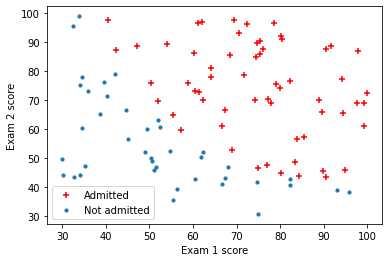

In [18]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(x[pos[:,0],0],x[pos[:,0],1],c="r",marker="+")
plt.scatter(x[neg[:,0],0],x[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

Cost Function For Logistic Regression
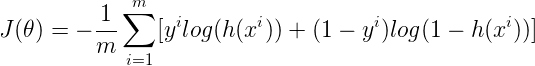

Gradient Descent


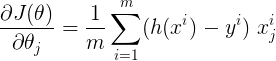



1.2   Implementation
1.2.1  Warmup exercise: sigmoid function

Before you start with the actual cost function, recall that the logistic regression hypothesis is deﬁned as:

hθ(x) = g(θT x),

where function g is the sigmoid function. The sigmoid function is deﬁned as:

 g(z) = 1/(1 + e−z ).

Means value of x for each column

In [19]:
mu=np.mean(x,axis=0)  

Standard Deviation of each column

In [20]:
std=np.std(x,axis=0)

In [21]:
mu.shape

(2,)

In [22]:
def feactureNormalization(x):
  mean=np.mean(x,axis=0)
  std=np.std(x,axis=0)
  x_norm=(x-mean)/std

  return x_norm,mean,std

In [23]:
x,x_mean,x_std=feactureNormalization(x)

In [24]:
x

array([[-1.60224763,  0.63834112],
       [-1.82625564, -1.2075414 ],
       [-1.53903969,  0.3612943 ],
       [-0.28210129,  1.0863683 ],
       [ 0.69152826,  0.49337794],
       [-1.06199728, -0.5357394 ],
       [-0.23437234,  1.63818413],
       [ 0.4845113 , -1.06373024],
       [ 0.53998666,  1.14651105],
       [ 0.97044832, -1.22709853],
       [ 1.56075461, -1.51418452],
       [ 0.48393864, -1.92641626],
       [ 0.86065022,  0.55490359],
       [ 0.1921582 ,  1.70347834],
       [-1.34839922,  0.53082781],
       [-0.60293429,  1.24314792],
       [ 0.17694982, -0.72913975],
       [ 0.11893077, -1.05699346],
       [ 0.25914553,  1.44433023],
       [ 0.58543944, -1.00845873],
       [ 0.0892403 , -1.26468472],
       [ 1.2413042 , -0.02285779],
       [-0.78042096, -0.93923898],
       [-1.62350714, -1.19053019],
       [ 0.63426559,  0.14875155],
       [-0.17423248,  0.20186768],
       [ 0.75131151, -1.15742514],
       [ 1.41886056, -1.4830648 ],
       [-0.19700066,

In [25]:
x_mean

array([65.64427406, 66.22199809])

In [26]:
x_std

array([19.36068671, 18.48963567])

In [27]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [28]:
sigmoid(0)

0.5

In [29]:
m,n=x.shape[0], x.shape[1]
m


100

In [30]:
n

2

Adding 1 values column to x feacture matrix

In [31]:
x=np.append(np.ones((m,1)),x,axis=1)

In [32]:
x

array([[ 1.        , -1.60224763,  0.63834112],
       [ 1.        , -1.82625564, -1.2075414 ],
       [ 1.        , -1.53903969,  0.3612943 ],
       [ 1.        , -0.28210129,  1.0863683 ],
       [ 1.        ,  0.69152826,  0.49337794],
       [ 1.        , -1.06199728, -0.5357394 ],
       [ 1.        , -0.23437234,  1.63818413],
       [ 1.        ,  0.4845113 , -1.06373024],
       [ 1.        ,  0.53998666,  1.14651105],
       [ 1.        ,  0.97044832, -1.22709853],
       [ 1.        ,  1.56075461, -1.51418452],
       [ 1.        ,  0.48393864, -1.92641626],
       [ 1.        ,  0.86065022,  0.55490359],
       [ 1.        ,  0.1921582 ,  1.70347834],
       [ 1.        , -1.34839922,  0.53082781],
       [ 1.        , -0.60293429,  1.24314792],
       [ 1.        ,  0.17694982, -0.72913975],
       [ 1.        ,  0.11893077, -1.05699346],
       [ 1.        ,  0.25914553,  1.44433023],
       [ 1.        ,  0.58543944, -1.00845873],
       [ 1.        ,  0.0892403 , -1.264

In [33]:
x.shape

(100, 3)

In [34]:
initial_theta=np.zeros((n+1,1))

In [35]:
initial_theta

array([[0.],
       [0.],
       [0.]])

In [36]:
z=np.dot(x,initial_theta)

In [37]:
h=sigmoid(z)

In [38]:
h.shape

(100, 1)

In [39]:
l=-y*np.log(h)-(1-y)*np.log(1-h)

In [40]:
l.shape

(100, 1)

In [41]:
cost=np.sum(l)/m

In [42]:
cost

0.6931471805599453

In [43]:
grad=np.dot(x.transpose(),(h-y))/m

In [44]:
grad

array([[-0.1       ],
       [-0.28122914],
       [-0.25098615]])

In [45]:
def costFunction(theta,x,y):
  m=len(y)
  z=np.dot(x,theta)
  h=sigmoid(z)
  l=(-y*np.log(h))-((1-y)*np.log(1-h))
  cost=np.sum(l)/m

  grad=np.dot(x.transpose(),(h-y))/m

  return cost,grad



 

In [46]:
initial_theta

array([[0.],
       [0.],
       [0.]])

In [47]:
x.shape

(100, 3)

In [48]:
y.shape

(100, 1)

In [49]:
cost,grad=costFunction(initial_theta,x,y)

In [50]:
cost

0.6931471805599453

In [51]:
grad

array([[-0.1       ],
       [-0.28122914],
       [-0.25098615]])

In [52]:
def gradientDescent(x,y,theta,alpha,num_iters):
  J_history=[]
  for i in range(num_iters):
    cost,grad=costFunction(theta,x,y)
    theta=theta-(alpha * grad)
    J_history.append(cost)
  
  return theta,J_history

In [53]:
theta,J_history=gradientDescent(x,y,initial_theta,1,400)

In [54]:
theta

array([[1.65947664],
       [3.8670477 ],
       [3.60347302]])

In [55]:
J_history

[0.6931471805599453,
 0.559403242545655,
 0.480587664853387,
 0.4304634223593615,
 0.3960564700549831,
 0.37096692788942354,
 0.35181143821554683,
 0.33666258234791707,
 0.3243484792498155,
 0.31411698799771764,
 0.3054632898746155,
 0.2980357306412133,
 0.29158158307561594,
 0.28591434088214984,
 0.28089320442020743,
 0.27640976797974864,
 0.27237912064657627,
 0.2687337409240408,
 0.2654192108626502,
 0.2623911455046634,
 0.25961295257859074,
 0.2570541709629099,
 0.2546892200293838,
 0.25249644553195266,
 0.2504573827607223,
 0.24855618107480798,
 0.2467791498207654,
 0.24511439661778675,
 0.24355153668345658,
 0.24208145734126255,
 0.24069612578706726,
 0.23938843105923613,
 0.2381520532694504,
 0.23698135472344692,
 0.23587128874252009,
 0.23481732289271776,
 0.23381537401406827,
 0.23286175297064182,
 0.23195311745280286,
 0.2310864314842389,
 0.2302589305394015,
 0.22946809137760052,
 0.2287116058600059,
 0.22798735814416737,
 0.22729340475420315,
 0.22662795710875622,
 0.225989

In [56]:
len(J_history)

400

Text(0.5, 1.0, 'Cost Function using Gradient Descent')

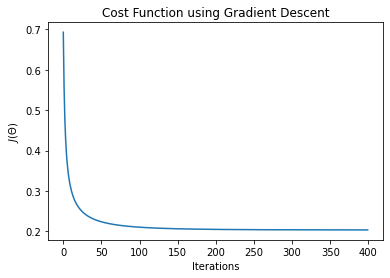

In [57]:
plt.plot(J_history)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Cost Function using Gradient Descent")

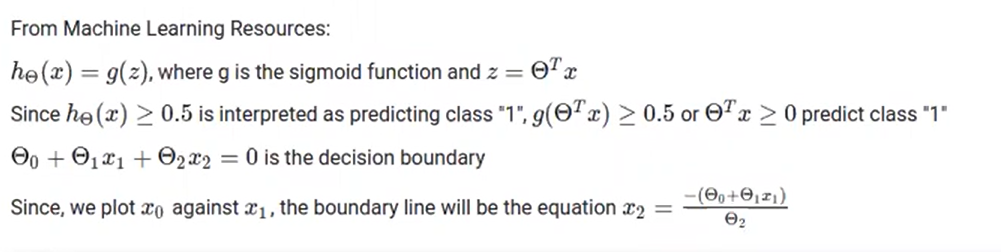

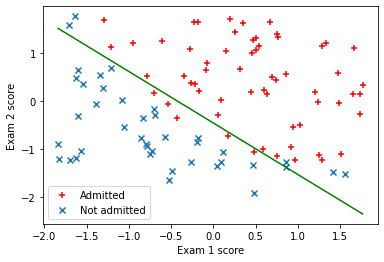

In [58]:
plt.scatter(x[pos[:,0],1],x[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(x[neg[:,0],1],x[neg[:,0],2],marker="x",label="Not admitted")
x_value=np.array([np.min(x[:,1]),np.max(x[:,1])])
y_value=-(theta[0]+theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value,"g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)


In [59]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [60]:
x_test=np.array([45,85])

Normalize 

In [61]:
x_test=(x_test-x_mean)/x_std

In [62]:
x_test

array([-1.06629865,  1.0155961 ])

In [63]:
x_test=np.append(np.ones(1),x_test)

In [64]:
x_test

array([ 1.        , -1.06629865,  1.0155961 ])

In [65]:
x_test.shape

(3,)

In [66]:
x_test=x_test.reshape(3,1)

In [67]:
theta

array([[1.65947664],
       [3.8670477 ],
       [3.60347302]])

In [68]:
z=np.dot(theta.transpose(),x_test)

In [69]:
sigmoid(z)

array([[0.76776289]])

In [70]:
print("For a student with scores 45 and 85, we predict an admission probability of ",sigmoid(z))

For a student with scores 45 and 85, we predict an admission probability of  [[0.76776289]]


In [71]:
def classfierPredict(theta,x):
  pred=x.dot(theta) # 100 x 3 *3 x 1=> 100 x 1

  return pred>0


In [72]:
p=classfierPredict(theta,x)

In [73]:
p

array([[False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [74]:
p.shape

(100, 1)

In [75]:
sum(p==y)

array([89])

In [76]:
print("train accuracy",sum(p==y)[0],"%")

train accuracy 89 %


In [171]:
df=pd.read_csv("/content/ex2data2.txt",header=None)

In [280]:
df.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [281]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

x.shape

(118, 2)

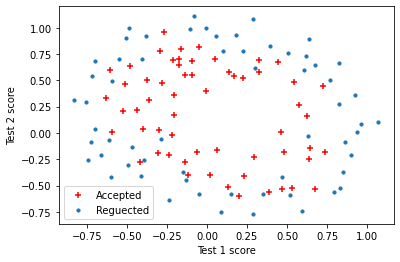

In [282]:
pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)
plt.scatter(x[pos[:,0],0],x[pos[:,0],1],c="r",marker="+")
plt.scatter(x[neg[:,0],0],x[neg[:,0],1],marker="o",s=10)
plt.xlabel("Test 1 score")
plt.ylabel("Test 2 score")
plt.legend(["Accepted","Reguected"],loc=0)

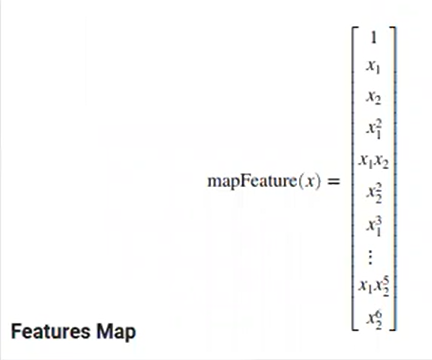

In [283]:
def mapFeature(x1,x2,degree):
  """
  take in numpy array of x1 and x2, return polynomial terms up to the given degree
  """
  out=np.ones(len(x1)).reshape(len(x1),1)# Firstly, adding 1 values column
  for i in range(1,degree+1): # begin with i
    for j in range(i+1): # begin with j (i+1)
      terms=(x1**(i-j)* x2**j).reshape(len(x1),1) # multiply each x1 with each x2 and adding one column
      out=np.hstack((out,terms)) # and then place side by side
  return out

In [284]:
x=mapFeature(x[:,0],x[:,1],10)

In [285]:
x.shape

(118, 66)

In [286]:
x[0:1]

array([[1.00000000e+00, 5.12670000e-02, 6.99560000e-01, 2.62830529e-03,
        3.58643425e-02, 4.89384194e-01, 1.34745327e-04, 1.83865725e-03,
        2.50892595e-02, 3.42353606e-01, 6.90798869e-06, 9.42624411e-05,
        1.28625106e-03, 1.75514423e-02, 2.39496889e-01, 3.54151856e-07,
        4.83255257e-06, 6.59422333e-05, 8.99809795e-04, 1.22782870e-02,
        1.67542444e-01, 1.81563032e-08, 2.47750473e-07, 3.38066048e-06,
        4.61305487e-05, 6.29470940e-04, 8.58939846e-03, 1.17205992e-01,
        9.30819197e-10, 1.27014235e-08, 1.73316321e-07, 2.36497484e-06,
        3.22710867e-05, 4.40352691e-04, 6.00879959e-03, 8.19926237e-02,
        4.77203078e-11, 6.51163877e-10, 8.88540781e-09, 1.21245165e-07,
        1.65444180e-06, 2.25755614e-05, 3.08053128e-04, 4.20351584e-03,
        5.73587598e-02, 2.44647702e-12, 3.33832185e-11, 4.55528202e-10,
        6.21587589e-09, 8.48182678e-08, 1.15738131e-06, 1.57929597e-05,
        2.15501646e-04, 2.94061154e-03, 4.01258940e-02, 1.254235

In [287]:
x_norm,x_mean,x_std=feactureNormalization(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [288]:
x_norm

array([[            nan, -7.10129423e-03,  9.97918051e-01, ...,
        -3.02866888e-01,  6.55375037e-02, -1.99676212e-01],
       [            nan, -2.98296321e-01,  9.69668805e-01, ...,
        -2.94623490e-01,  4.59418823e-03, -2.14093861e-01],
       [            nan, -5.42901033e-01,  9.83793428e-01, ...,
        -2.32870230e-01, -5.14860291e-02, -2.07227313e-01],
       ...,
       [            nan, -1.09035391e+00,  1.57702761e+00, ...,
         6.92608747e+00, -5.67156758e+00,  2.40270449e+00],
       [            nan, -1.23578900e-01,  1.57702761e+00, ...,
        -3.06303202e-01, -3.35999240e-02,  2.40270449e+00],
       [            nan,  1.16849077e+00, -4.12944396e-01, ...,
        -3.07540697e-01,  4.11195950e-02, -2.75402940e-01]])

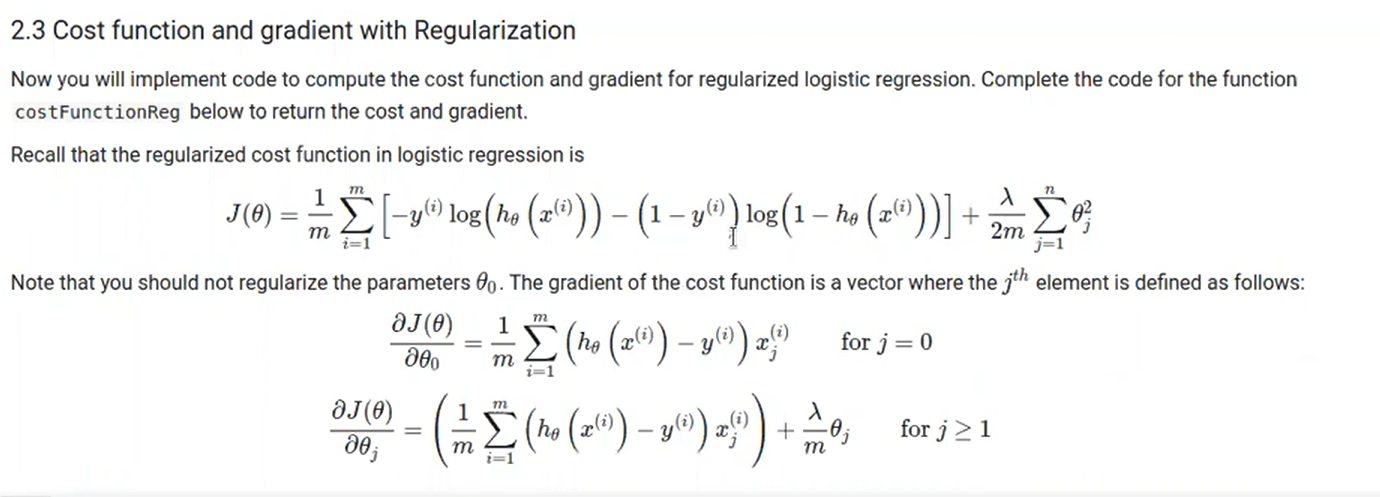

In [302]:
m,n=x.shape[0],x.shape[1]

In [303]:
m

118

In [304]:
n

66

In [305]:
initial_theta=np.zeros((n,1))

In [306]:
initial_theta.shape

(66, 1)

In [307]:
z=np.dot(x,initial_theta)

In [308]:
h=sigmoid(z)

In [309]:
l=(-y*np.log(h))-((1-y)*np.log(1-h))

In [310]:
cost=np.sum(l)/m

In [311]:
cost

81.79136730607354

In [312]:
Lambda=1

In [313]:
reg=Lambda/(2*m) * np.dot(initial_theta[1:].transpose(),initial_theta[1:])

In [314]:
reg_cost=cost + reg

In [315]:
reg_cost

array([[81.79136731]])

In [316]:
Lambda=1

In [317]:
y.shape

(118,)

In [318]:
y=y.reshape(m,1)


In [319]:
y.shape

(118, 1)

In [320]:
def costFunctionReg(theta,x,y,Lambda):
  m=len(y)  
  h=sigmoid(np.dot(x,theta))  # 118x28   * 28 x 1
  l=(-y * np.log(h))-((1-y)*np.log(1-h))
  cost=1/m * np.sum(l)
  reg=Lambda/(2*m) * (np.dot(theta[1:].transpose(),theta[1:]))  # Adding all theta value except first theta value
  regCost=cost + reg

  # compute gradient , x.T * (h-y)-----28x118  * 118  x 1---28x1
  j_0=1/m * (np.dot(x.transpose(),(h-y)))[0]  # for gradient 1
  j_1=1/m * (np.dot(x.transpose(),(h-y)))[1:]+ (Lambda/m)*theta[1:] # gradient except 1
  grad=np.vstack((j_0[:np.newaxis],j_1))  # vertical stack (changing J_0 to Array)
  return regCost[0], grad

In [321]:
initial_theta=np.zeros((n,1))

In [322]:
Lambda=1

In [324]:
cost,grad=costFunctionReg(initial_theta,x,y,Lambda)

In [ ]:
cost

In [326]:
def gradientDesentreg(x,y,theta,alpha,num_iters,Lambda):
  m=len(y)
  J_history=[]

  for i in range(num_iters):
    cost,grad=costFunctionReg(theta,x,y,Lambda)
    theta=theta-(alpha * grad)
    J_history.append(cost)
  
  return theta, J_history



In [327]:
theta, J_history= gradientDesentreg(x,y,initial_theta,1,800,0.2)

Text(0.5, 1.0, 'Cost functin using Gradient Descent')

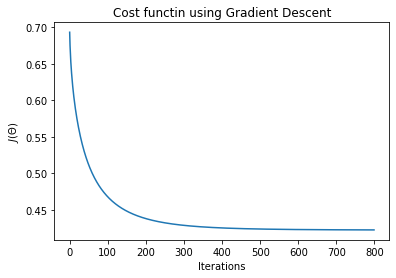

In [328]:
plt.plot(J_history)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Cost functin using Gradient Descent")

In [329]:
def mapFeaturePlot(x1,x2,degree):
  """
  take in numpy array of x1 and x2, return all polynomial terms up to the given degree
  """
  out=np.ones(1)
  for i in range(1,degree+1):
    for j in range(i+1):
      terms=(x1**(i-j) * x2**j)
      out=np.hstack((out,terms))
  return out


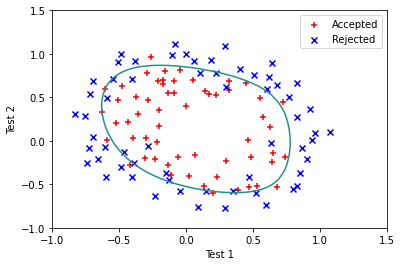

In [330]:
plt.scatter(x[pos[:,0],1], x[pos[:,0],2], c="r", marker="+", label="Accepted")
plt.scatter(x[neg[:,0],1], x[neg[:,0],2], c="b", marker="x", label="Rejected")

# Plotting decision boundary

u_vals=np.linspace(-1,1.5,50)
v_vals=np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals), len(v_vals)))
for i in range(len(u_vals)):
  for j in range(len(v_vals)):
    z[i,j]=mapFeaturePlot(u_vals[i],v_vals[j],10) @ theta

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(loc=0)


In [337]:
def classfierPredict(theta,x):
  """
  take in numpy array of theta and xa nad predict the class
  """
  p=sigmoid(x.dot(theta)) # 
  a=p>=0.5
  return a

In [338]:
p=classfierPredict(theta,x)

In [339]:
sum(p==y)/m

array([0.83050847])

In [340]:
print ("Accuracy = ",sum(p==y)/m)

Accuracy =  [0.83050847]


In [341]:
from sklearn.linear_model import LogisticRegression

In [342]:
model=LogisticRegression(penalty="l2")

In [343]:
model.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [344]:
p=model.predict(x)

In [345]:
p.shape

(118,)

In [348]:
p=p.reshape(m,1)

In [351]:
sum(p==y)/m

array([0.83050847])

In [353]:
?LogisticRegression  # if you want to know LogisticRegression